# Plotten und Visualisieren

## Kurze Einführung

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [14]:
data = np.arange(10)
data


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

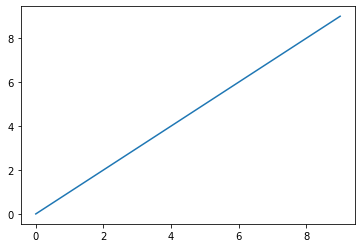

In [15]:
plt.plot(data)

### Diagramme und Subplots
Diagramme befinden sich in einem Figure-Objekt. Dieses kann man mit `plt.figure` erstellen.

In [28]:
fig = plt.figure() # Erstelle ein Figure-Objekt als Container für Diagramme

<Figure size 432x288 with 0 Axes>

Damit man etwas sieht, muss man mindestens ein subplot erstellen. Das geschieht mit `add_subplot`:

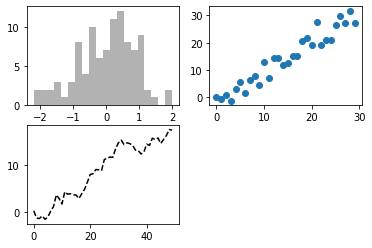

In [36]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1) # Das Figure-Objekt hat nun 2x2 Digramme und wir wählen das 1. Diagramm aus und ordnen es ax1 zu.
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--') # verwendet die letzte Zuordung, k=ist ein stil, eine schwarze gestrichelte Linie 
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3) # ax1, ax2, ax3 sind Objekte vom Typ AxesSubplot und können gefüllt werden.
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

Geht auch etwas bequemer:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff00b5f2790>,
      dtype=object)

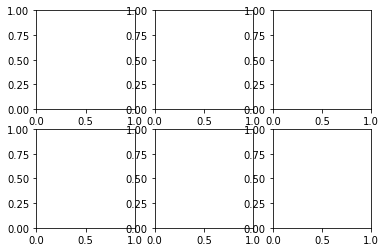

In [37]:
fig, axes = plt.subplots(2, 3)
axes

## Einstellen von Zwischenräumen um Subplots
Lassen sich leicht mit `subplots_adjust` einstellen. 

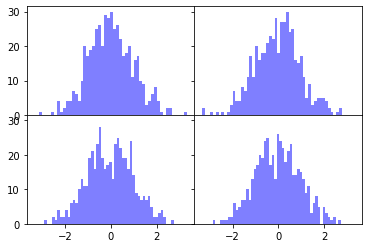

In [40]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='b', alpha=0.5)

plt.subplots_adjust(wspace=0, hspace=0)

### Farben, Markierungen und Linenformen

plot aktzeptiert x und y Koordinaten und wahlweise eine Farbe und eine Linienform. Um z.B. y über x grün gestrichelt zu plotten, kann man folgendes eingeben:

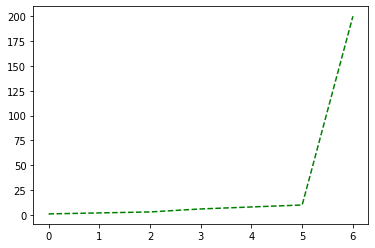

In [49]:
plt.figure()
from numpy.random import randn

# data = randn(30).cumsum()
data = [1,2,3,6,8,10,200]
plt.plot(data, 'g--') # ax.plot(x, y, linestyle='--', color='g')

plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [16]:
plt.close('all')

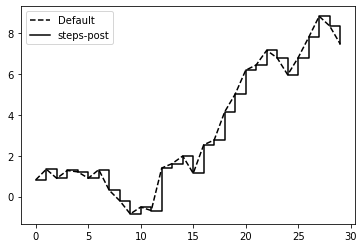

In [17]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best') # Legende hinzufügen

### Skalenstriche, Beschriftungen und Legende

#### Titel, Achsentitel, Skalenstriche und Beschriftungen setzen

Text(0.5, 0, 'Stufen')

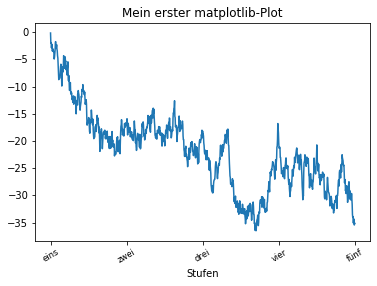

In [56]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['eins', 'zwei', 'drei', 'vier', 'fünf'],
                            rotation=30, fontsize='small')
ax.set_title('Mein erster matplotlib-Plot')
ax.set_xlabel('Stufen')

#### Legenden hinzufügen

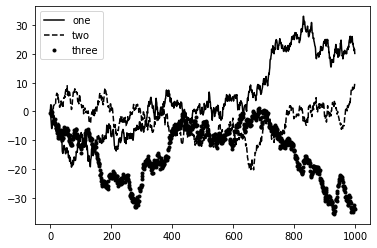

In [58]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

### Annotationen und Zeichnungen in einem Subplot

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

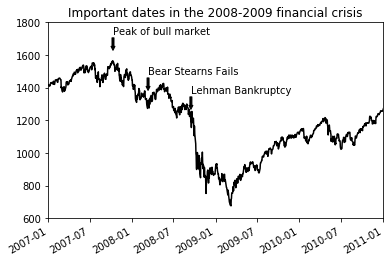

In [60]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('data/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

Zeichnungen hinzufügen

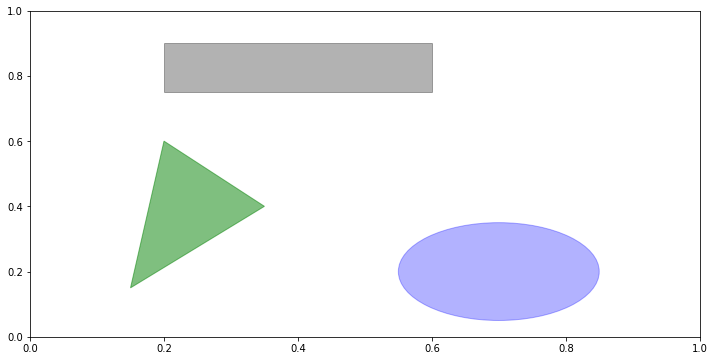

In [28]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Diagramme in Dateien abspeichern

In [ ]:
plt.savefig('figpath.svg')

In [ ]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

### Konfigurieren von matplotlib

In [ ]:
plt.rc('figure', figsize=(10, 10))

In [ ]:
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)

## Plotting von Funktionen in pandas

pandas verwendet matplotlib für die Darstellung von Diagrammen. Man kann relativ einfach aus einer Series oder einem DataFrame ein Diagramm erstellen.

In [2]:
import pandas as pd

df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})
df

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,peter,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2
5,lisa,33,F,texas,1,2
6,jose,20,M,texas,4,3


### Punktwolke

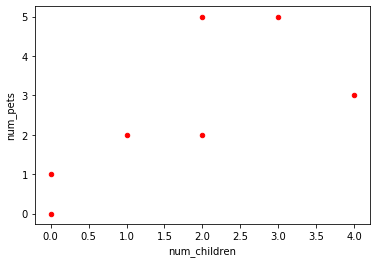

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# a scatter plot comparing num_children and num_pets
df.plot(kind='scatter',x='num_children',y='num_pets',color='red')
plt.show()

## Balkendiagramm

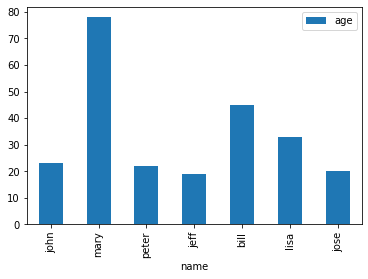

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# a simple line plot
df.plot(kind='bar',x='name',y='age')


## Mehrere Spalten plotten

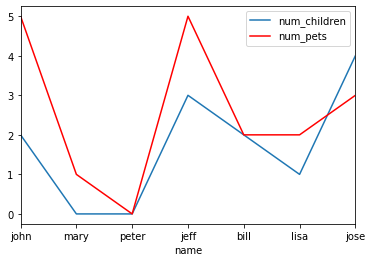

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# gca steht für 'get current axis'. Dadurch werden zwei Kurven in das selbe Diagramm geplottet.
ax = plt.gca()

df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()


## Das Diagramm in eine Datei speichern

Statt plt.show() kann man `plt.savefig('output.png')` schreiben.

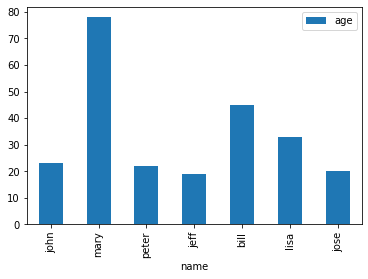

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

df.plot(kind='bar',x='name',y='age')

# the plot gets saved to 'output.png'
# plt.savefig('img/output.png')

## Groupieren und Balkendiagramm erstellen

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

df.groupby('state')['name'].nunique().plot(kind='bar')
plt.show()

KeyError: 'state'

## Histogramm

Um Diagramme mit Zeitstempel zu erstellen, muss man ein Datum in ein datetime umwandeln. Hierzu verwendet man `pandas.to_datetime()`.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'name':[
        'john','lisa','peter','carl','linda','betty'
    ],
    'date_of_birth':[
        '01/21/1988','03/10/1977','07/25/1999','01/22/1977','09/30/1968','09/15/1970'
    ]
})
df

,name,date_of_birth
0,john,01/21/1988
1,lisa,03/10/1977
2,peter,07/25/1999
3,carl,01/22/1977
4,linda,09/30/1968
5,betty,09/15/1970


Jetzt wandeln wir die Spalte `date_of_birth` in ein datetime objekt um.

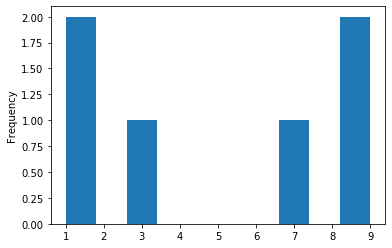

In [20]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'],infer_datetime_format=True)
df # infer_datetime_format: Versucht pandas das Format zu erkennen. Ist ziemlich langsam...
plt.clf() # Löscht aktuelles Diagramm
df['date_of_birth'].map(lambda d: d.month).plot(kind='hist') # lambda ist eine anonyme Funktion: lambda Argument : Ausdruck
plt.show()

## Übungen

### Übung 1

Lade die Daten aus der Datei `data/yob1880.txt` in ein DataFrame und erstelle einen Balkendiagramm mit der Anzahl der männlichen und weiblichen Vornamen.

### Übung 2

Lade die Daten aus der Datei `data/tip.csv` in ein DataFrame und erstelle ein Linendiagramm mit den  Spalten `tip` und `total_bill`.